In [478]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV

# Feature Engineering

This is the process of using domain knowledge to extract features through data mining.

## Extracting information:

- Considering a dataset with timestamps for each row

    - For us to work with this data we need to convert it to a numerical expression

- Now considering a dataset with long text data, we could think about extracting information such as

    - Length of text
    - Number of times certain words are mentioned

## Combining Information


- We can combine given information or extracted information.
    - Here we can get a new feature with 0 or 1 values indicating a combination of two other features.

## Transforming Information

- Very common for string data as most algorithms can't accept string data.
    - Let's say we have a feature where we encode country codes. We can transform it using:
        > **Integer Encoding:** 
        > - Directly converts categories into integers. 
        > - This may or may not work depeding on the feature and the domain.
        > - For this case it wont work, but if we think  of it in the case for a spice level for a sauce it would make sense.
        
        > **One-hot Encoding:** 
        > - It creates features using 0 and 1 for every single category for that feature. Meaning it will create more columns in our data.
        > - It requires a lot of tuning  and domain experience to choose the categories correctly.
        > - Considering a binary (up down) feature it will give us two inverted features giving us redundant data, this can be fixed by dropping the redundant data.
        > - It is also difficult to add new categories, as we have to update the amount of columns used.





# Dealing with outliers

Often a dataset will have a few extreme outliers and its beetter to simply remove them to have a more generalized model.

What should we consider for it?
>- Range and Limits
>- Percentage of Data

We need to use some methodology such as:
>- InterrQuartile Range
>- Standard Deviation
>- Domain Limit Value

Things to consider:
>- Percentage of Data
>   - If a large percentage of the data is being labeled as an outlier it means we have a wide distribution.
>   - We should have a few percentage points of outliers.
>- Utilize visualization plots to identify outliers.
>- It will create caveats for future models.

Lets create a random distributioon of ages to work with.

In [479]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu,scale=sigma,size=num_samples)
    sample_ages = np.round(sample_ages,decimals=0)

    return sample_ages

In [480]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

We  can see the normal distribution, identifyiing possible outliers at around 20 and 70 years old.

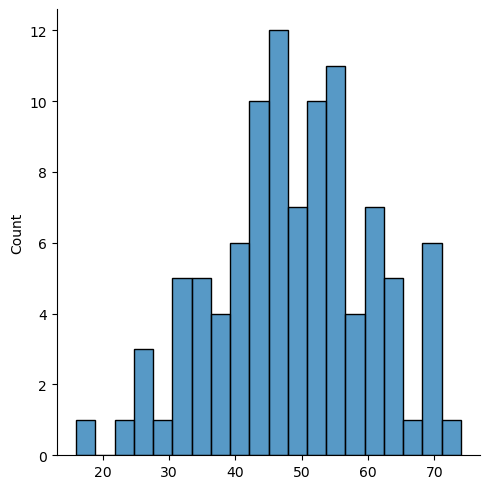

In [481]:
sns.displot(sample, bins=20)

But checking the box plot we can see that the biggets outlier is below 20.

c:\Users\aguil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

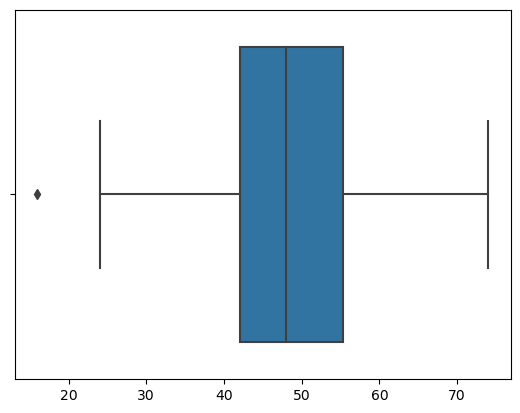

In [482]:
sns.boxplot(sample)

But how can we identify it in a more mathematical way.

We can transform it into a pandas series. And check the IQR, which is the range between the 25% and 75%.

In [483]:
ser = pd.Series(sample)

ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

We can see thatt our lower limit is 22.13, meaning that everything below is an outtlier.

In [484]:
IQR = 55.25 - 42
Lower_lim = 42.0 - 1.5*IQR
Lower_lim

22.125

We can remove these outliers by doing the following:

In [485]:
ser[ser > Lower_lim]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

We can get the IQR the following way:

In [486]:
q75,q25 =  np.percentile(sample,[75,25])

IQR  = q75 -  q25

Lower_lim =  q25 - 1.5*IQR

Lower_lim

22.125

Let's work with a full dataset. For this let's import it, and lets check its correlatio based on it's sale price.

In [487]:
df = pd.read_csv('E:\Machine Learning\DATA\Ames_Housing_Data.csv')
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

We can see that Overall Qual is the most strongly coorrelated value to Sale Price.

We can see that our correlation is between 1 and 10, and we can also see a few outliers in our data.

We can identify that some houses are of a good quality but they are  selling for a really low price.

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

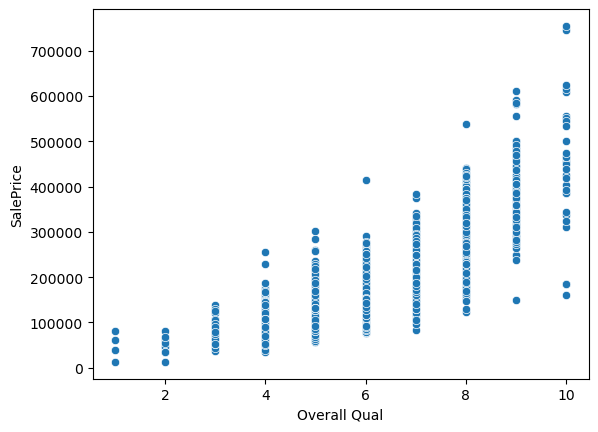

In [488]:
sns.scatterplot(data=df,x='Overall Qual', y='SalePrice')

Let's check the living area no, as it is  the second most correlated.

Here we can see the same outliers that have a low selling point, but a large living area.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

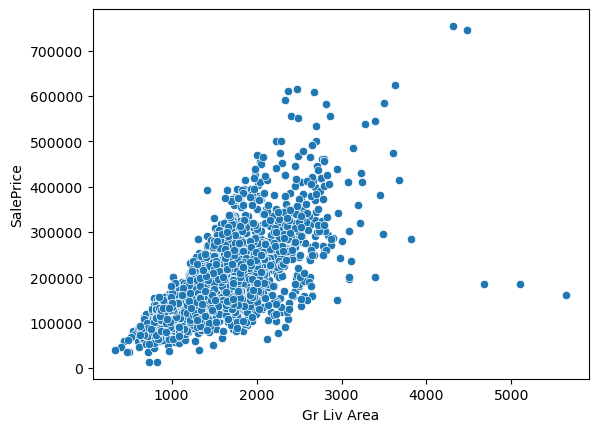

In [489]:
sns.scatterplot(data=df,x='Gr Liv Area', y='SalePrice')

We can use pandas to verify this outliers.

We can see that this is the type of outliers we don't want because it makes  our  model less linear.

In [490]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [491]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


We can see that we reduced the amount of outliers to 3, now we can remove them from our data.

In [492]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

df = df.drop(drop_ind)


Now, we can see that  without those outliers the graph makes more sense. And it makes it easier to fit.

Let's also save this to a file.

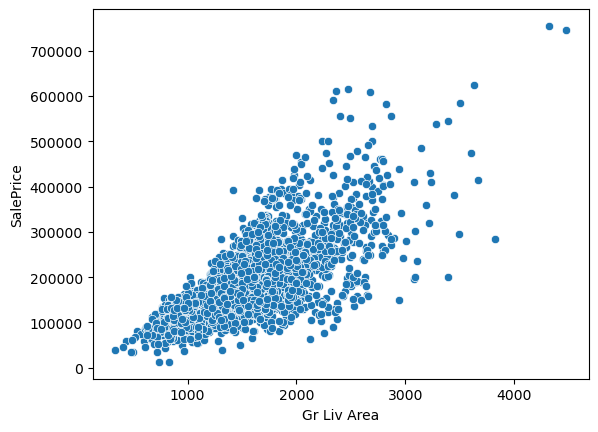

In [493]:
sns.scatterplot(data=df,x='Gr Liv Area', y='SalePrice')

df.to_csv('Ames_outliers_removed.csv')

# Dealing with Missing Data


We can import our data, and check for columns we can drop. One example is PID, as we already have an index, and this data  does not give us anything of value, we can drop it.

In [494]:
df = pd.read_csv('Ames_outliers_removed.csv')

df = df.drop('PID',axis=1)

We can check for the columns with the most missing data, for this we can do the following:

In [495]:
100 * df.isnull().sum() / len(df)

Unnamed: 0         0.00000
MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 81, dtype: float64

Let's create a function that gives us all the percentages, and visualize the amount of missing data we actually have.

In [496]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()

    return percent_nan

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'Garage Area'),
  Text(2, 0, 'Total Bsmt SF'),
  Text(3, 0, 'Bsmt Unf SF'),
  Text(4, 0, 'BsmtFin SF 1'),
  Text(5, 0, 'BsmtFin SF 2'),
  Text(6, 0, 'Garage Cars'),
  Text(7, 0, 'Bsmt Full Bath'),
  Text(8, 0, 'Bsmt Half Bath'),
  Text(9, 0, 'Mas Vnr Area'),
  Text(10, 0, 'Mas Vnr Type'),
  Text(11, 0, 'BsmtFin Type 1'),
  Text(12, 0, 'Bsmt Qual'),
  Text(13, 0, 'Bsmt Cond'),
  Text(14, 0, 'BsmtFin Type 2'),
  Text(15, 0, 'Bsmt Exposure'),
  Text(16, 0, 'Garage Type'),
  Text(17, 0, 'Garage Finish'),
  Text(18, 0, 'Garage Qual'),
  Text(19, 0, 'Garage Cond'),
  Text(20, 0, 'Garage Yr Blt'),
  Text(21, 0, 'Lot Frontage'),
  Text(22, 0, 'Fireplace Qu'),
  Text(23, 0, 'Fence'),
  Text(24, 0, 'Alley'),
  Text(25, 0, 'Misc Feature'),
  Text(26, 0, 'Pool QC')])

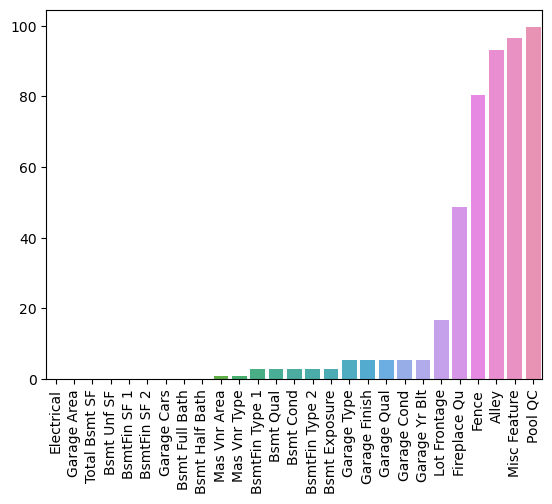

In [497]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

## Dropping or missing based on rows

Now we should consider whether we should drop or fill in the missing data based on domain knowledge.

Let's now see what data is between 0 and 1% missing as that is a reasonable amount to consider filling or removing.

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

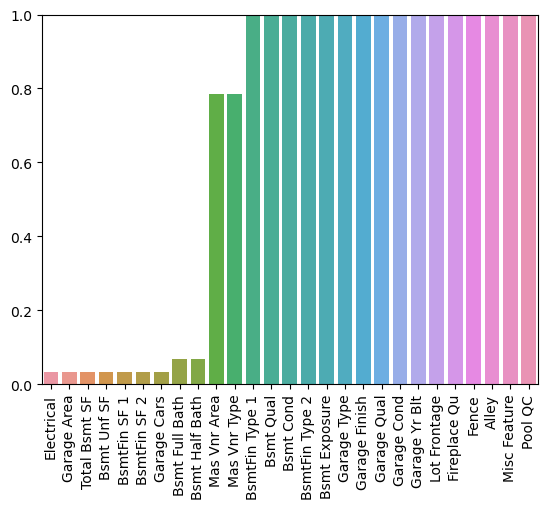

In [498]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

percent_nan[percent_nan < 1]

Let's see what are this rows that have missing data, and see if they are different rows.

In [499]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

In [500]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Let's now drop the lowest percentage rows.

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

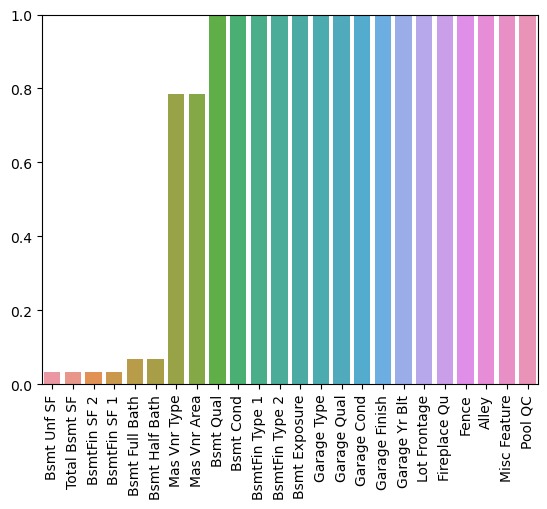

In [501]:
df = df.dropna(axis=0,subset=['Electrical','Garage Cars'])
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

percent_nan[percent_nan < 1]

We can now see that we have 1 or 2 rows missing from the basement features, let's check them  out.

We can see that they are both the same rows.

In [502]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [503]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


### Filing Numeric Columns

For this case, filling this missing data is going to be by filling with 0s.

In [504]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Total Bsmt SF',
                 'Bsmt Full Bath','Bsmt Half Bath','Bsmt Unf SF']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

### Filling String Columns

Here we are going to be filling it with the string 'None'.

In [505]:
bsmt_str_cols = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure', 'BsmtFin Type 1',
                 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

### Checking for the null rows again

In [506]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Now we can see that we dropped the rows that we have this information missing, but we  aree still missing two features.

Mas Vnr Type    0.786325
Mas Vnr Area    0.786325
dtype: float64

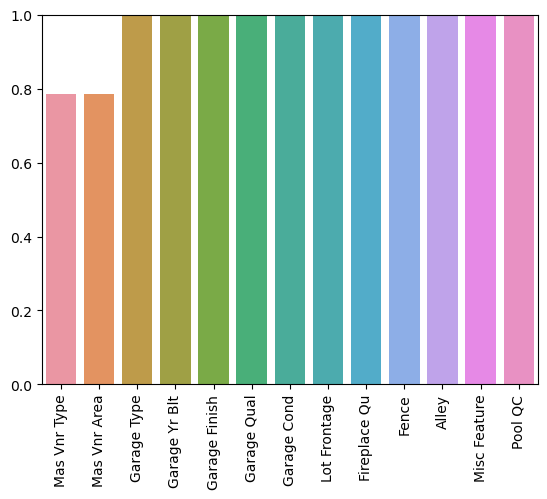

In [507]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

percent_nan[percent_nan < 1]

In [508]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

We can now recalculate our percent missing and plot our results again. We can see that we finally don't have any features below 1%.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'Misc Feature'),
  Text(10, 0, 'Pool QC')])

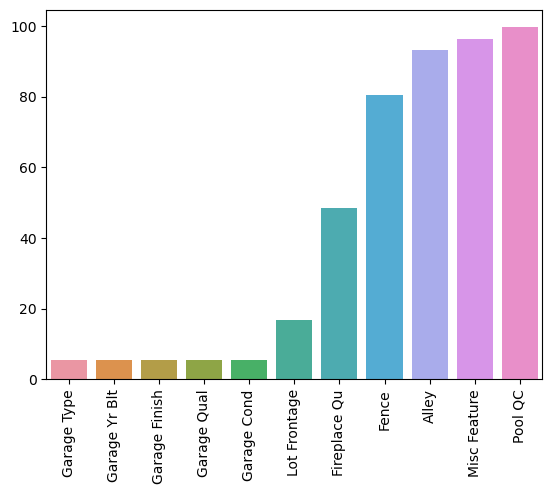

In [509]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


## Dealing with features (Columns)

We will take two aproaches
- Filling missing values
- Dropping feature

### Dropping the feature column

- Pros:
    - Simple to do
    - No longer need to worry about this feature

- Cons:
    - Potential to lose a feature with important signal

### Filling in missing data

- It has the potential to change ground trith in data
- We must decide on reasonable estimation to fiil the values
- It must apply transformation to all future predictions

> **Simple cases:**
>   - Replace all null values with reasonable assumptions such as 0.

> **Harder cases:**
>   - Must use statisitcal methods based on other columns to fill the null values.


Example:
- Let's take a data set about people with some age data missing
    - We could fill the data based on being enrolled in college, and us having an average age of 20 years to people enrolled in college.


From our graph above we can see that the garage values are equal in size, meaning we can deal with this values independently. As a result we can see we end up with less of a percentage of missing values.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

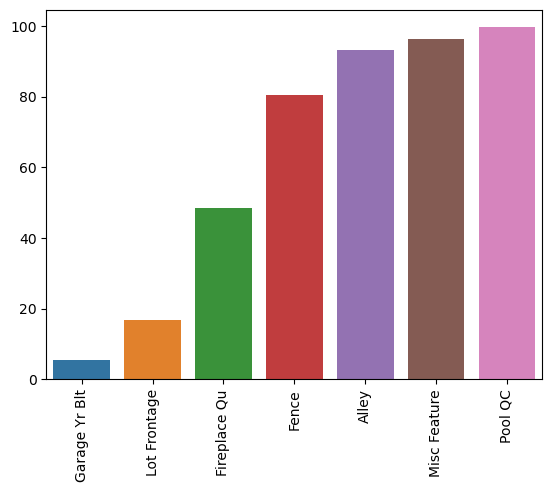

In [510]:
garage_str_cols = ['Garage Type','Garage Finish','Garage Qual', 'Garage Cond']

df[garage_str_cols] = df[garage_str_cols].fillna('None')

percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

We are only missing the year built. We could average out and calculate this as our fill in value, but we know this rows are missing a garage so we can fill it as a 0.

In [511]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

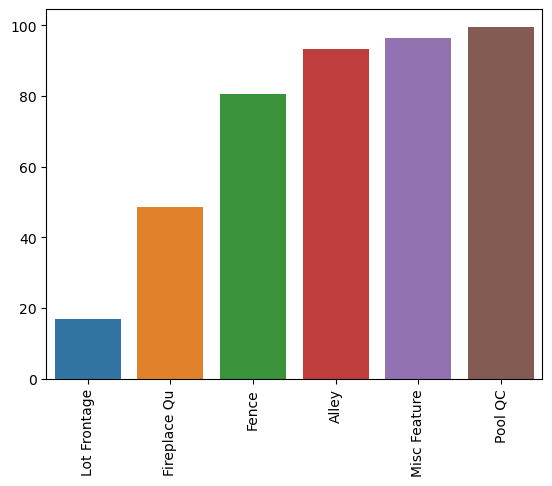

In [512]:
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

Now we have the large amount of data missing features. Depending on the domain knowledge, we could fill the missing data with a value such asa 0, but in this case we are going to drop them fully.

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

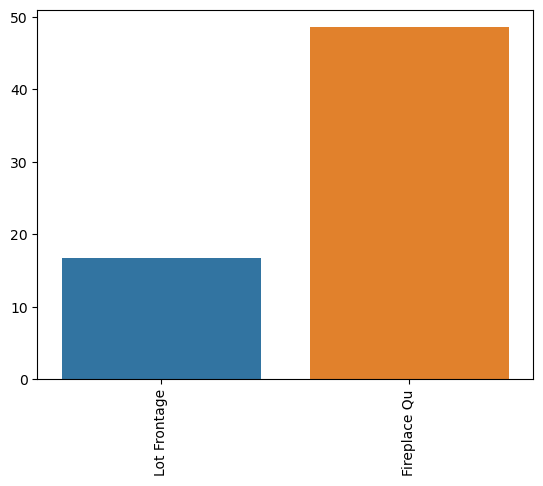

In [513]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1)

percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

Now we must decide what to do with the remaining features.

We can see that our Firplace Qu feature contains string data, meaning we can fill this feature with *none* values.

In [514]:
df['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [515]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Now, in this case with Front Lotage we can see it's a numeric value. For this case we will use the neigborhood value to average this value.

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

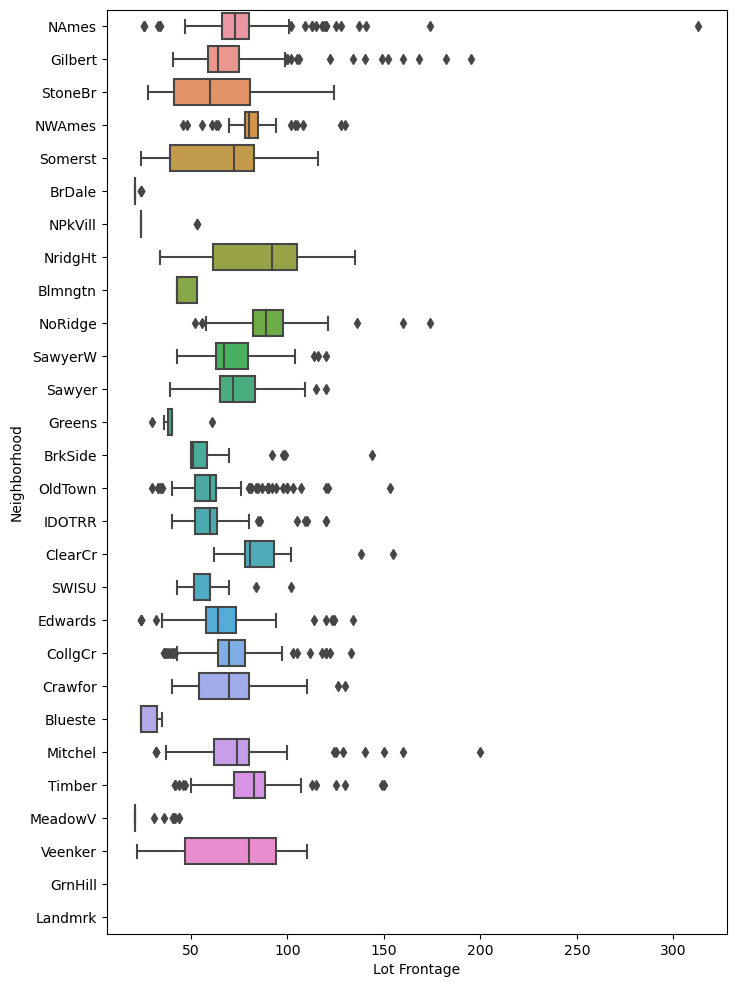

In [516]:
plt.figure(figsize=(8,12))
sns.boxplot(data=df, x='Lot Frontage', y='Neighborhood')

###  Group by column

We are going to get the average value of lot frontage based on the neighborhood.

In [517]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [518]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(
    lambda value: value.fillna(value.mean()))

We can see that we are only missing 3 values in this feature, and based on context we can fill it with 0 as it is a numeric size value.

In [519]:
df.isnull().sum()

Unnamed: 0        0
MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 77, dtype: int64

In [520]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

percent_nan = percent_missing(df)

#sns.barplot(x=percent_nan.index,y=percent_nan)
#plt.xticks(rotation=90)

We can now see we get an error as we do not have any more missing

In [521]:
df.to_csv('Ames_no_missing.csv')

## Dealing with categorical  data

In [522]:
df = pd.read_csv('Ames_no_missing.csv')


We can see cases such as the MS SubClass feature, that shows numeric data, but it is actually categorical. For this cases we can transform it into  str data.

In [523]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

Let's separate our str features. In pandas strings are stored as objects, so we call the object class.

In [524]:
obj_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

df_obj_dummies = pd.get_dummies(obj_df,drop_first=True)

In [525]:
df_obj_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2921,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2923,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Now that we've converted this values into numeric data, we can concatenate it.

In [526]:
final_df = pd.concat([num_df,df_obj_dummies], axis=1)

In [528]:
final_df = final_df.loc[:, ~final_df.columns.str.contains('^Unnamed')]

In [529]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


In [530]:
df.to_csv('Ames_final.csv')